In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv("diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [7]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [42]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
num_preg=tf.feature_column.numeric_column("Pregnancies")
plasma_gluc=tf.feature_column.numeric_column("Glucose")
dias_press=tf.feature_column.numeric_column("BloodPressure")
tricep=tf.feature_column.numeric_column("SkinThickness")
inuslin=tf.feature_column.numeric_column("Insulin")
bmi=tf.feature_column.numeric_column("BMI")
diabetes_pedigree=tf.feature_column.numeric_column("DiabetesPedigreeFunction")
age=tf.feature_column.numeric_column("Age")

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

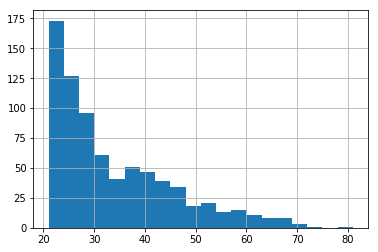

In [12]:
diabetes["Age"].hist(bins=20)

In [39]:
age_bucket=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [14]:
feat_cols=[num_preg,plasma_gluc,dias_press,tricep,inuslin,bmi,diabetes_pedigree,age_bucket]

In [15]:
x_data=diabetes.drop("Outcome",axis=1)

In [16]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [17]:
labels=diabetes["Outcome"]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [20]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=100,shuffle=True)

In [21]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp52qucq7v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3ad484c860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [22]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp52qucq7v/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 315.638
INFO:tensorflow:loss = 3.9057531, step = 101 (0.319 sec)
INFO:tensorflow:global_step/sec: 544.518
INFO:tensorflow:loss = 5.2348127, step = 201 (0.183 sec)
INFO:tensorflow:global_step/sec: 555.289
INFO:tensorflow:loss = 7.1126127, step = 301 (0.181 sec)
INFO:tensorflow:global_step/sec: 579.263
INFO:tensorflow:loss = 4.842034, step = 401 (0.173 sec)
INFO:tensorflow:global_step/sec: 486.857
INFO:tensorflow:loss = 8.399336, step = 501 (0.205 sec)
INFO:tensorflow:global_step/sec: 486.596
INFO:tensorflow:loss = 3.4706855, step = 601 (0.206 sec)
INFO:tensorflow:global_step/sec: 496.671
INFO:tensorflow:los

In [23]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [24]:
results=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-06-07:56:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp52qucq7v/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-06-07:56:17
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.8017695, auc_precision_recall = 0.65635395, average_loss = 0.52439857, global_step = 1000, label/mean = 0.35064936, loss = 5.047336, precision = 0.63013697, prediction/mean = 0.3742419, recall = 0.56790125


In [25]:
results

{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8017695,
 'auc_precision_recall': 0.65635395,
 'average_loss': 0.52439857,
 'label/mean': 0.35064936,
 'loss': 5.047336,
 'precision': 0.63013697,
 'prediction/mean': 0.3742419,
 'recall': 0.56790125,
 'global_step': 1000}

In [26]:
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [27]:
predictions=model.predict(pred_input_func)

In [28]:
my_pred=list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp52qucq7v/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [29]:
my_pred

[{'logits': array([0.06308305], dtype=float32),
  'logistic': array([0.51576555], dtype=float32),
  'probabilities': array([0.48423448, 0.51576555], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.6158874], dtype=float32),
  'logistic': array([0.64928263], dtype=float32),
  'probabilities': array([0.3507174 , 0.64928263], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.38610184], dtype=float32),
  'logistic': array([0.40465605], dtype=float32),
  'probabilities': array([0.59534395, 0.40465608], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.784794], dtype=float32),
  'logistic': array([0.3132876], dtype=float32),
  'probabilities': array([0.6867124, 0.3132876], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.8569505], dtype=float32),
  'logistic': ar

In [30]:
feat_cols=[num_preg,plasma_gluc,dias_press,tricep,inuslin,bmi,diabetes_pedigree,age_bucket]

In [31]:
input_func=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=100,shuffle=False)

In [32]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,20,20,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp2izdl9fk', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3ad3f13550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [33]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp2izdl9fk/model.ckpt.
INFO:tensorflow:loss = 7.0351553, step = 1
INFO:tensorflow:global_step/sec: 331.433
INFO:tensorflow:loss = 7.2549706, step = 101 (0.304 sec)
INFO:tensorflow:global_step/sec: 554.18
INFO:tensorflow:loss = 6.3425465, step = 201 (0.179 sec)
INFO:tensorflow:global_step/sec: 500.976
INFO:tensorflow:loss = 12.398598, step = 301 (0.200 sec)
INFO:tensorflow:global_step/sec: 579.381
INFO:tensorflow:loss = 4.4171453, step = 401 (0.175 sec)
INFO:tensorflow:global_step/sec: 497.229
INFO:tensorflow:loss = 4.0640893, step = 501 (0.199 sec)
INFO:tensorflow:global_step/sec: 494.612
INFO:tensorflow:loss = 3.5439968, step = 601 (0.209 sec)
INFO:tensorflow:global_step/sec: 508.474
INFO:tensorflow:l

In [34]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [35]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-06-07:56:23
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp2izdl9fk/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-06-07:56:24
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7619048, accuracy_baseline = 0.64935064, auc = 0.82185185, auc_precision_recall = 0.6643752, average_loss = 0.49940985, global_step = 1000, label/mean = 0.35064936, loss = 4.80682, precision = 0.6666667, prediction/mean = 0.37885782, recall = 0.6419753


{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82185185,
 'auc_precision_recall': 0.6643752,
 'average_loss': 0.49940985,
 'label/mean': 0.35064936,
 'loss': 4.80682,
 'precision': 0.6666667,
 'prediction/mean': 0.37885782,
 'recall': 0.6419753,
 'global_step': 1000}